In [2]:
import pandas as pd
import numpy as np
import os
import acquire

# visualize
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(11, 9))
plt.rc('font', size=13)



# acquire
import env 
from env import host, user, password
from pydataset import data

from sklearn.model_selection import train_test_split

from acquire import get_titanic_data, get_iris_data



1. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

* print the first 3 rows
* print the number of rows and columns (shape)
* print the column names
* print the data type of each column
* print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [53]:

data('iris', show_doc=True)


iris

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Edgar Anderson's Iris Data

### Description

This famous (Fisher's or Anderson's) iris data set gives the measurements in
centimeters of the variables sepal length and width and petal length and
width, respectively, for 50 flowers from each of 3 species of iris. The
species are _Iris setosa_, _versicolor_, and _virginica_.

### Usage

    iris
    iris3

### Format

`iris` is a data frame with 150 cases (rows) and 5 variables (columns) named
`Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`, and `Species`.

`iris3` gives the same data arranged as a 3-dimensional array of size 50 by 4
by 3, as represented by S-PLUS. The first dimension gives the case number
within the species subsample, the second the measurements with names `Sepal
L.`, `Sepal W.`, `Petal L.`, and `Petal W.`, and the third the species.

### Source

Fisher, R. A. (1936) The use of multiple measurements in taxonomi

In [58]:
df = get_iris_data()

#### Print the first 3 rows

In [59]:
df.head(3)

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2


#### print the number of rows and columns (shape)

 

In [60]:
df.species_name.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species_name, dtype: int64

#### print the column names


In [6]:

df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [7]:
#another way 
df_iris.columns.to_list()

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

#### print the data type of each column


In [8]:
# just data types.

df_iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [9]:

df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


#### print the summary statistics for each of the numeric variables. Would you recommend 

In [10]:
stats = df_iris.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [11]:
stats['range'] = stats['max'] - stats['min']
stats[['mean', '50%', 'std', 'range']]

,mean,50%,std,range
Sepal.Length,5.843333,5.80,0.828066,3.6
Sepal.Width,3.057333,3.00,0.435866,2.4
Petal.Length,3.758000,4.35,1.765298,5.9
Petal.Width,1.199333,1.30,0.762238,2.4


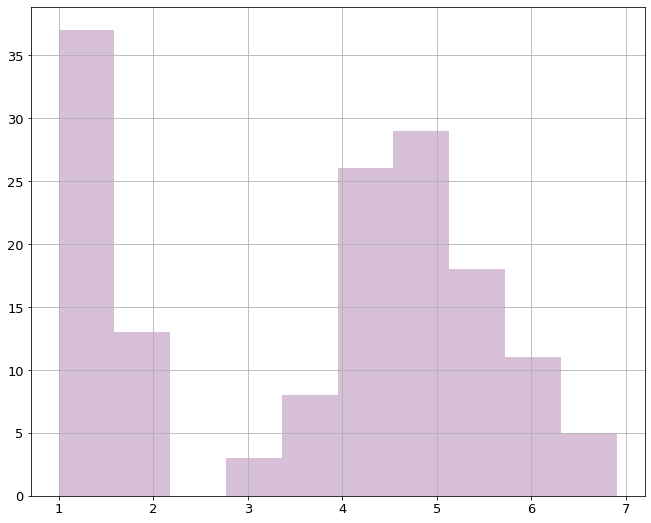

In [12]:
#visualize
df_iris['Petal.Length'].hist(color='thistle')

plt.show()

#### reccomendation

There is no need to scale the numeric values as they all fall within the same units of measure.


2. Read the `Table1_CustDetails` table from the `Excel_Exercises.xlsx` file into a dataframe named `df_excel`.

* assign the first 100 rows to a new dataframe, df_excel_sample
* print the number of rows of your original dataframe
* print the first 5 column names
* print the column names that have a data type of object
* compute the range for each of the numeric variables.

In [13]:
df_excel = pd.read_excel('Spreadsheets_Exercises.xlsx', sheet_name='Table1_CustDetails')

In [14]:

df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7049 non-null   object 
 1   gender             7049 non-null   object 
 2   is_senior_citizen  7049 non-null   int64  
 3   partner            7049 non-null   object 
 4   dependents         7049 non-null   object 
 5   phone_service      7049 non-null   int64  
 6   internet_service   7049 non-null   int64  
 7   contract_type      7049 non-null   int64  
 8   payment_type       7049 non-null   object 
 9   monthly_charges    7049 non-null   float64
 10  total_charges      7038 non-null   float64
 11  churn              7049 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 661.0+ KB


In [15]:
df_excel = df_excel.astype({"is_senior_citizen": "object", "phone_service": "object", 
         "internet_service": "object", "contract_type": "object"})

df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7049 non-null   object 
 1   gender             7049 non-null   object 
 2   is_senior_citizen  7049 non-null   object 
 3   partner            7049 non-null   object 
 4   dependents         7049 non-null   object 
 5   phone_service      7049 non-null   object 
 6   internet_service   7049 non-null   object 
 7   contract_type      7049 non-null   object 
 8   payment_type       7049 non-null   object 
 9   monthly_charges    7049 non-null   float64
 10  total_charges      7038 non-null   float64
 11  churn              7049 non-null   object 
dtypes: float64(2), object(10)
memory usage: 661.0+ KB


#### assign the first 100 rows to a new dataframe, df_excel_sample

In [16]:
df_excel_sample = df_excel.head(100)

In [17]:
df_excel_sample.shape

(100, 12)

#### print the number of rows of your original dataframe

In [18]:

df_excel.shape[0]

7049

#### print the first 5 column names

In [19]:

df_excel.columns[:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

#### print the column names that have a data type of object

In [20]:
df_excel.select_dtypes(include='object').head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,churn
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,No
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,No
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,Yes
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,Yes
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,Yes


In [21]:
df_excel.select_dtypes(include='object').columns


Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents',
       'phone_service', 'internet_service', 'contract_type', 'payment_type',
       'churn'],
      dtype='object')

#### compute the range for each of the numeric variables.

In [22]:
range_compute = df_excel.describe().T
range_compute

,count,mean,std,min,25%,50%,75%,max
monthly_charges,7049.0,64.747014,30.099460,18.25,35.4500,70.35,89.850,118.75
total_charges,7038.0,2283.043883,2266.521984,18.80,401.5875,1397.10,3793.775,8684.80


In [23]:
range_compute['range'] = range_compute['max'] - range_compute['min']
range_compute

,count,mean,std,min,25%,50%,75%,max,range
monthly_charges,7049.0,64.747014,30.099460,18.25,35.4500,70.35,89.850,118.75,100.5
total_charges,7038.0,2283.043883,2266.521984,18.80,401.5875,1397.10,3793.775,8684.80,8666.0


3. Read the data from <a href=''>this google sheet</a> into a dataframe, `df_google`

* print the first 3 rows
* print the number of rows and columns
* print the column names
* print the data type of each column
* print the summary statistics for each of the numeric variables
* print the unique values for each of your categorical variables

In [24]:
# Google sheet url.

sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

In [25]:
# Convert Google sheet address into a CSV export URL.

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

In [26]:
# R pandas pd.read_csv()

df_google = pd.read_csv(csv_export_url)

#### print the first 3 rows

In [27]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


#### print the number of rows and columns

In [28]:
df_google.shape

(891, 12)

#### print the column names

In [29]:
df_google.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

#### print the data type of each column

In [30]:
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [31]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [32]:

df_google = df_google.astype({'PassengerId': 'object', 'Survived': 'object', 'Pclass': 'object'})
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    object 
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 83.7+ KB


#### print the summary statistics for each of the numeric variables

In [33]:

df_google.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


#### print the unique values for each of your categorical variables

In [34]:

for col in df_google:
    if df_google[col].dtypes == 'object':
        print(f'{col} has {df_google[col].nunique()} unique values.')

PassengerId has 891 unique values.
Survived has 2 unique values.
Pclass has 3 unique values.
Name has 891 unique values.
Sex has 2 unique values.
Ticket has 681 unique values.
Cabin has 147 unique values.
Embarked has 3 unique values.


In [35]:
for col in df_google.select_dtypes('object'):
    print(f'{col} has {df_google[col].nunique()} unique values')

PassengerId has 891 unique values
Survived has 2 unique values
Pclass has 3 unique values
Name has 891 unique values
Sex has 2 unique values
Ticket has 681 unique values
Cabin has 147 unique values
Embarked has 3 unique values


### Acquire.py

In [36]:
###################### Acquire Titanic Data ######################

def get_connection(db, user=user, host=host, password=password):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'
    
def new_titanic_data():
    '''
    This function reads the titanic data from the Codeup db into a df,
    write it to a csv file, and returns the df.
    '''
    sql_query = 'SELECT * FROM passengers'
    df = pd.read_sql(sql_query, get_connection('titanic_db'))
    df.to_csv('titanic_df.csv')
    return df

def get_titanic_data(cached=False):
    '''
    This function reads in titanic data from Codeup database if cached == False 
    or if cached == True reads in titanic df from a csv file, returns df
    '''
    if cached or os.path.isfile('titanic_df.csv') == False:
        df = new_titanic_data()
    else:
        df = pd.read_csv('titanic_df.csv', index_col=0)
    return df

###################### Acquire Iris Data ######################

def new_iris_data():
    '''
    This function reads the iris data from the Codeup db into a df,
    writes it to a csv file, and returns the df.
    '''
    sql_query = """
                SELECT species_id,
                species_name,
                sepal_length,
                sepal_width,
                petal_length,
                petal_width
                FROM measurements
                JOIN species
                USING(species_id)
                """
    df = pd.read_sql(sql_query, get_connection('iris_db'))
    df.to_csv('iris_df.csv')
    return df

def get_iris_data(cached=False):
    '''
    This function reads in iris data from Codeup database if cached == False
    or if cached == True reads in iris df from a csv file, returns df
    '''
    if cached or os.path.isfile('iris_df.csv') == False:
        df = new_iris_data()
    else:
        df = pd.read_csv('iris_df.csv', index_col=0)
    return df

## Acquire

In [37]:
def get_connection(db, user=user, host=host, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [38]:

def new_titanic_data():
    sql_query = 'SELECT * FROM passengers'
    df = pd.read_sql(sql_query, get_connection('titanic_db'))
    df.to_csv('titanic_df.csv')
    return df

In [39]:
def get_titanic_data(cached=False):
    '''
    This function reads in titanic data from Codeup database if cached == False
    or if cached == True reads in titanic df from a csv file, returns df
    '''
    if cached or os.path.isfile('titanic_df.csv') == False:
        df = new_titanic_data()
    else:
        df = pd.read_csv('titanic_df.csv', index_col=0)
    return df

## Using the Iris Data:

- `Use the function defined in acquire.py to load the iris data.`



In [61]:
df = get_iris_data()

In [41]:
iris.describe()

,species_id,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,2.000000,5.843333,3.057333,3.758000,1.199333
std,0.819232,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,1.000000,5.100000,2.800000,1.600000,0.300000
50%,2.000000,5.800000,3.000000,4.350000,1.300000
75%,3.000000,6.400000,3.300000,5.100000,1.800000
max,3.000000,7.900000,4.400000,6.900000,2.500000


In [42]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species_id    150 non-null    int64  
 1   species_name  150 non-null    object 
 2   sepal_length  150 non-null    float64
 3   sepal_width   150 non-null    float64
 4   petal_length  150 non-null    float64
 5   petal_width   150 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 8.2+ KB


- `Drop the species_id and measurement_id columns.`

In [43]:
iris = iris.drop(columns='species_id')
iris.head(2)

,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2


- `Rename the species_name column to just species.`

In [62]:
df.head() 

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


In [64]:
df.rename(columns={'species_name': 'species'}, inplace=True)

In [65]:
df.columns

Index(['species_id', 'species', 'sepal_length', 'sepal_width', 'petal_length',
       'petal_width'],
      dtype='object')

- `Create dummy variables of the species name.`

In [76]:
dummies = pd.get_dummies(df[['species']],drop_first=True)

In [77]:
dummies

,species_versicolor,species_virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [78]:
df =pd.concat([df,dummies],axis=1)

In [79]:
df.head()

,species_id,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,1,setosa,5.1,3.5,1.4,0.2,0,0
1,1,setosa,4.9,3.0,1.4,0.2,0,0
2,1,setosa,4.7,3.2,1.3,0.2,0,0
3,1,setosa,4.6,3.1,1.5,0.2,0,0
4,1,setosa,5.0,3.6,1.4,0.2,0,0


- `Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.`

In [82]:
def clean_iris(df):
    '''
    clean_iris will take one argument df, a pandas, dataframe anticipate to be the iris dataset
    and will remove species_id and measurement_id columns, remname species_name to species
    encode species to new columns.
    '''
    df =df.drop(['species_id', 'measurement_id'], axis=1)
    df.rename(columns={'species_name':'species'})
    dummies = pd.get_dummies(df[['species']],drop_first=True) 
    df =pd.concat([df,dummies],axis=1)

In [89]:
def prep_iris(cached=True):
    '''
    prep_iris will take one argument df, a pandas, dataframe anticipate to be the iris dataset
    and will remove species_id and measurement_id columns, remname species_name to species
    encode species to new columns.
    '''
    df = clean_iris(df)
    train_validate, test = train_test_split(df,test_size=0.2, random=1349, stratify=df.species)
    train, validate = train_test_split(train_validate, train_size=0.7, random_state=1349, stratify = train.validate.species)
    return train, validate ,test

In [68]:
prep_iris()

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0
5,setosa,5.4,3.9,1.7,0.4,0,0
6,setosa,4.6,3.4,1.4,0.3,0,0
7,setosa,5.0,3.4,1.5,0.2,0,0
8,setosa,4.4,2.9,1.4,0.2,0,0
9,setosa,4.9,3.1,1.5,0.1,0,0


<hr style="border-top: 10px groove limegreen; margin-top: 1px; margin-bottom: 1px"></hr>

## <font color ='blue'> Exploratory Analysis</font>

-post walkthrough solutions

In [3]:
def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

query = "SELECT measurements.measurement_id, measurements.sepal_length,\
                measurements.sepal_width, measurements.petal_length, \
                measurements.petal_width, species.species_name, species.species_id \
            FROM measurements JOIN species ON(species.species_id=measurements.species_id)"

def get_data():
    return pd.read_sql(query,get_connection('iris_db'))

df = get_data()

def prep_data(df):
    df['species'] = df['species_name']
    iris_df = df.drop(columns=['measurement_id', 'species_id', 'species_name'])
    return iris_df
    
iris_df = prep_data(df)

iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
plt.rc('font', size=12)
plt.rc('figure', figsize=(12, 8))

` 1. Split your data into train, validate, and test samples.`

In [9]:
from sklearn.model_selection import train_test_split

def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2,
                                            random_state= seed,
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3,
                                      random_state=seed,
                                      stratify=train_validate[target])
    return train, validate, test
train, validate, test= train_validate_test_split(iris_df, target='species')

__2. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.__

<AxesSubplot:xlabel='variable', ylabel='value'>

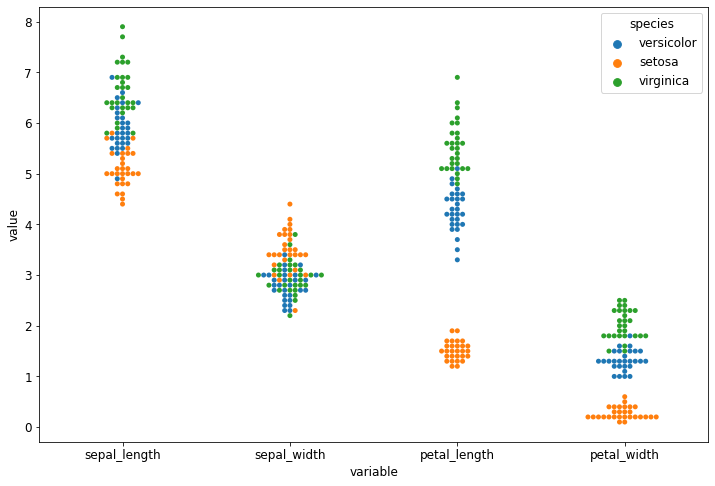

In [11]:
melt = train.melt(id_vars=['species'])
# this viz is useful b/c all of our measurements have a similar scale
sns.swarmplot(data=melt, x='variable', y='value', hue='species')

###### Takeaways:
- petal_length and petal_width show the most seperation between species.
- Could petal and sepal area be useful features?

`3. Create 4 subplots (2 rows x 2 columns) of scatterplots.`

   * sepal_length x sepal_width
   * petal_length x petal_width
   * sepal_area x petal_area
   * sepal_length x petal_length
* What are your takeaways?


In [12]:
train['sepal_area'] = train.sepal_length * train.sepal_width
train['petal_area'] = train.petal_length * train.petal_width

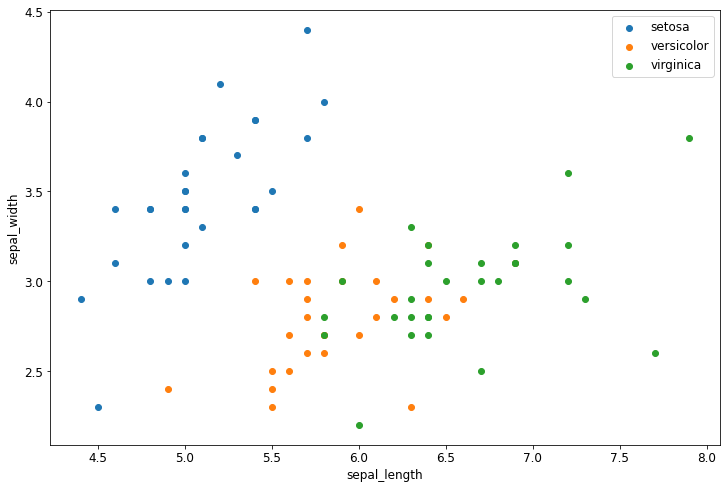

In [13]:
def scatter_by_species(x, y):
    for species, subset in train.groupby('species'):
        plt.scatter(subset[x], subset[y], label=species)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.legend()

# test it with one plot
scatter_by_species('sepal_length', 'sepal_width')

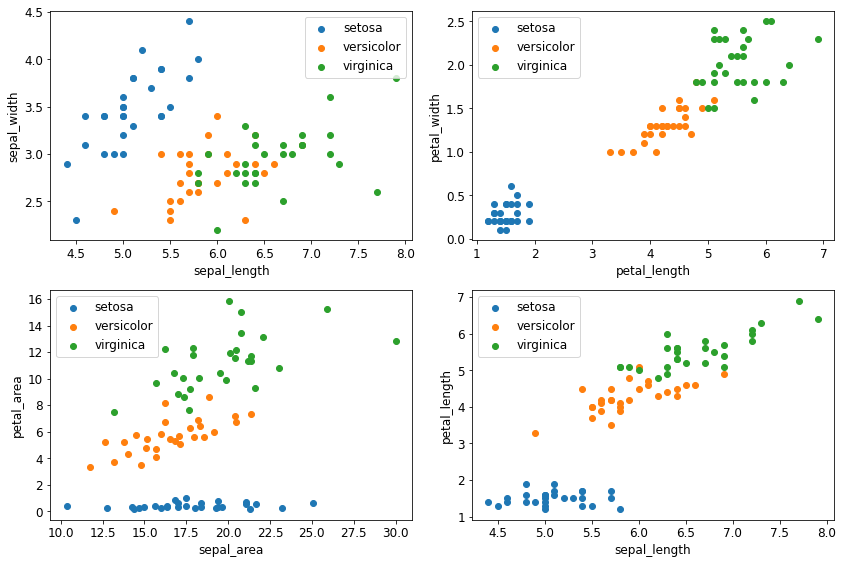

In [14]:
plt.subplot(2, 2, 1)
scatter_by_species('sepal_length', 'sepal_width')
plt.subplot(2, 2, 2)
scatter_by_species('petal_length', 'petal_width')
plt.subplot(2, 2, 3)
scatter_by_species('sepal_area', 'petal_area')
plt.subplot(2, 2, 4)
scatter_by_species('sepal_length', 'petal_length')

plt.tight_layout()


##### Takeaways:
- sepal_length is useful,not great but likely adds some value.
- petal_length is useful
- Not enough seperation horizontally, to tell if sepal area is useful

__4. Create a heatmap of each variable layering correlation coefficient on top.__

- n.b. do not put a heatmap with all correlation coefficients labeled as is in a presentation! A heatmap can be useful with minimal detail included. 
- Maybe adding extreme values labeled. But not like this! This is for YOUR exploration.

In [16]:
train.corr()

,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area
sepal_length,1.000000,-0.154904,0.867976,0.824691,0.619853,0.860498
sepal_width,-0.154904,1.000000,-0.476228,-0.403306,0.673554,-0.341702
petal_length,0.867976,-0.476228,1.000000,0.957345,0.271618,0.953510
petal_width,0.824691,-0.403306,0.957345,1.000000,0.299920,0.982404
sepal_area,0.619853,0.673554,0.271618,0.299920,1.000000,0.373870
petal_area,0.860498,-0.341702,0.953510,0.982404,0.373870,1.000000


<AxesSubplot:>

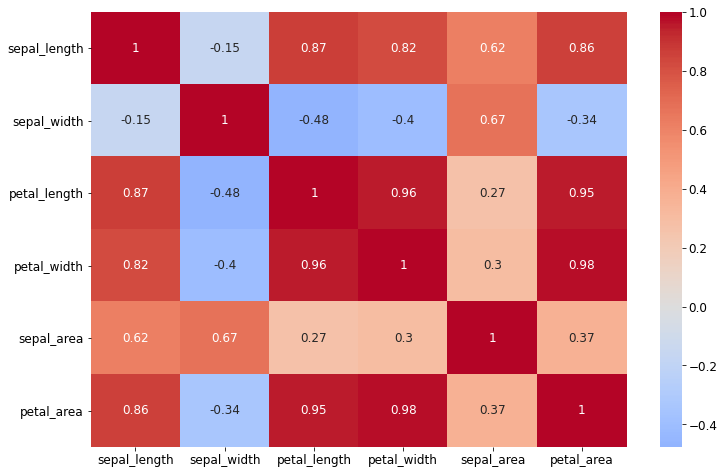

In [17]:
sns.heatmap(train.corr(), cmap='coolwarm', center=0, annot=True)

###### Takeaways 
- most measures correlate with each other, the least is sepal_width with sepal_lenght @ -.15.  

- Negative correlations: Wider sepals => shorter & narrower petals (smaller petal areas)

- Positive correlations: Longer sepals => longer & wider petals (larger petal areas)

- Little to no **LINEAR** correlation: sepal length & sepal width. 


`5. Create a scatter matrix visualizing the interaction of each variable.`

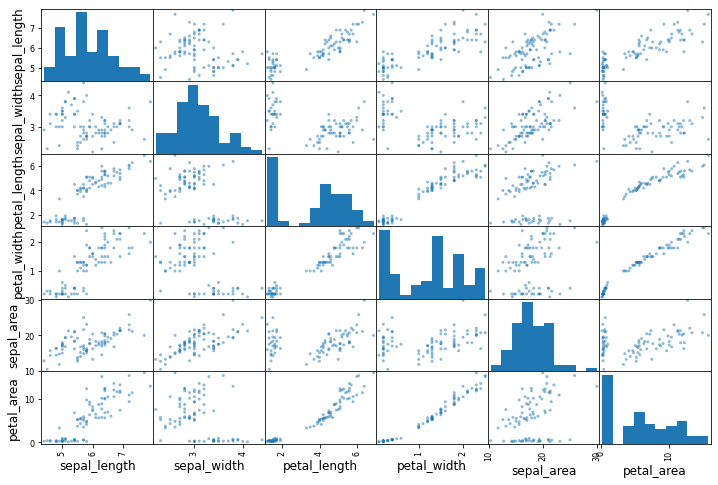

In [18]:
pd.plotting.scatter_matrix(train)
plt.show()

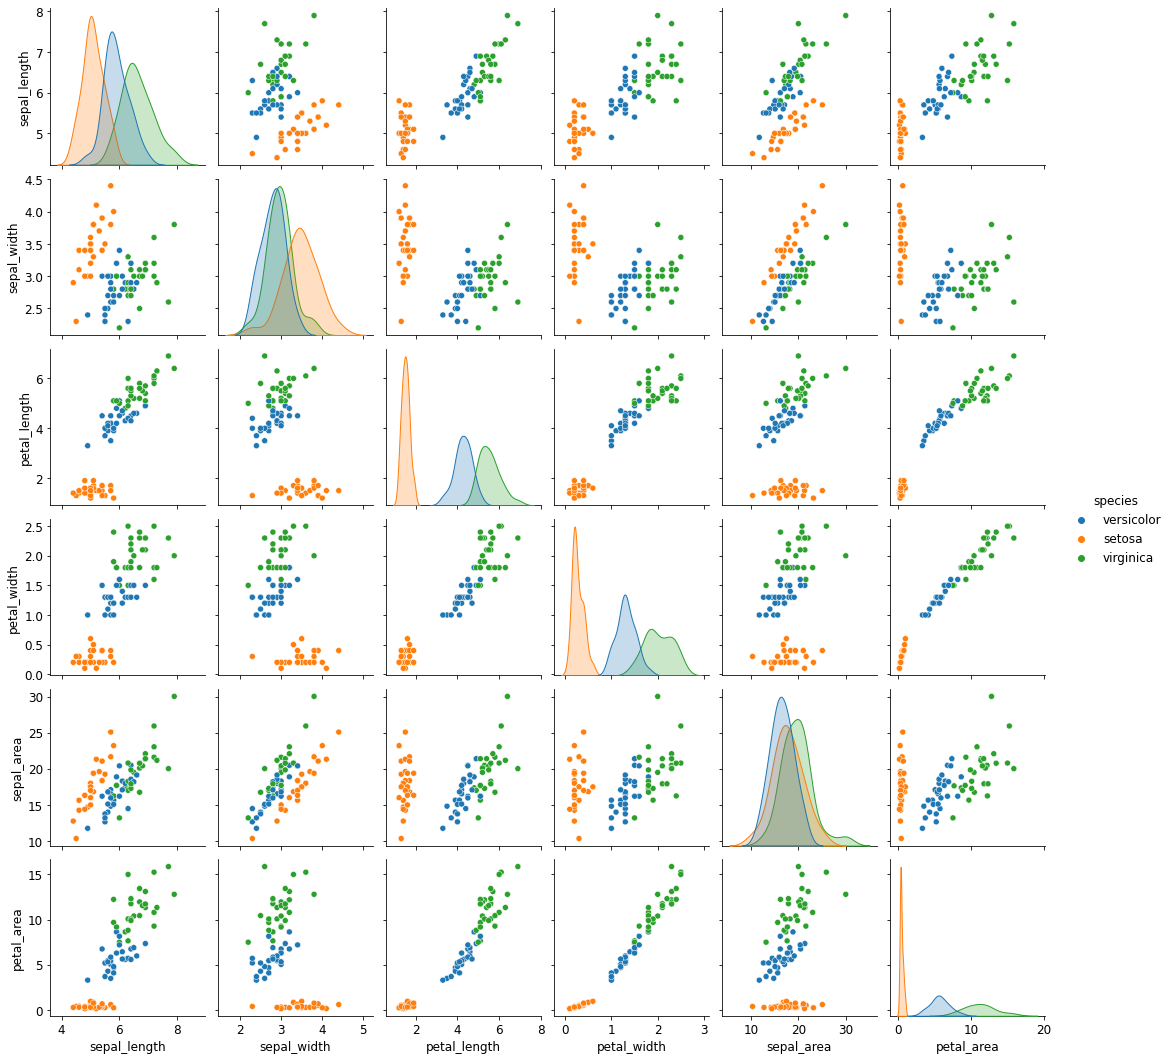

In [19]:
sns.pairplot(train, hue='species')
plt.show()

**Takeaways** 

- petal length + petal width show the most seperation between species.
- setosa has the shortest and narrowest petals. It will be the easiest to determine. 
- petal area seems to show the largest separation between virginica & versicolor of all the individual features. 
- virginica shows slightly longer sepals, but whether that difference is significant, it's hard to say. 
- virginica and versicolor show little to no difference when it comes to the width of the sepals. 

`6. Is the sepal length significantly different in virginica compared to versicolor? Run a statistical experiment to test this.`

    - Make sure to include a null hypothesis, alternative hypothesis, results, and summary.

    - What is your takeaway from this statistical testing?

__First Step__ : **Test**

- We want to compare mean sepal length of the 2 different species. Therefore, a t-test or Mann-Whitney test will be useful. 
    - Mann-Whitney is the *non-parametric* version of the t-test. That means that if <u>your data does not meet the necessary assumptions for a t-test</u>, you can use the Mann-Whitney test. You can use it exactly the same as you would the t-test. It is just a different method to call from scipy.stats. 


__Second Step__ : **Assumptions**
    
    Assumptions are met and we will use an independent t-test. 

- Looking at the histograms, distribution appears **normal**. 
- Looking at the histograms, **variance** appears mostly equal. 
- We know that versicolor flowers and virginica flowers are **independent** and separate species. 


 __Third Step__: **Hypothesis**


- alpha = .05

- $H_0$: Sepal length is the same in virginica and versicolor. $\mu_{virginica} == \mu_{versicolor}$.  

- $H_a$: Sepal length significantly different in virginica and versicolor. $\mu_{virginica} != \mu_{versicolor}$. 

In [20]:
import scipy.stats as stats

virginica = train[train.species == 'virginica']
versicolor = train[train.species == 'versicolor']

In [21]:
# looks normal on histogram, and mean and median are very close. 
# We can assume normality with minimal risk. 

train.sepal_length.describe()

count    84.000000
mean      5.870238
std       0.769099
min       4.400000
25%       5.375000
50%       5.800000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64

In [22]:
# variances are close. 
virginica.sepal_length.var(), versicolor.sepal_length.var()

(0.283425925925926, 0.18109788359788362)

In [23]:
stats.ttest_ind(virginica.sepal_length,
                versicolor.sepal_length,
                equal_var= False
               )

Ttest_indResult(statistic=5.656491804882077, pvalue=6.856736413800083e-07)

__Step 4__: **Conclusion**

**Conclusion** 

- We reject $H_0$ that the sepal length is the same for both groups.

**Takeaway**

- Sepal length will be a useful feature. 

`7. Create any other visualizations and run any other statistical tests you think will be helpful in exploring this data set.`

What about sepal_width?  
​
**Hypothesis**
​
- alpha = .05
​
- $H_0$: Sepal width is the same in virginica and versicolor. $\mu_{virginica} == \mu_{versicolor}$.  
​
- $H_a$: Sepal width significantly different in virginica and versicolor. $\mu_{virginica} != \mu_{versicolor}$. 


In [25]:
stats.mannwhitneyu(virginica.sepal_width, 
                   versicolor.sepal_width
                  )

MannwhitneyuResult(statistic=274.0, pvalue=0.026286295699228482)

**Conclusion**

- We reject  𝐻0  that the sepal width is the same!

**Takeaway**

- Sepal width, while not the strongest indicator, is still useful.

<hr style="border-top: 10px groove limegreen; margin-top: 1px; margin-bottom: 1px"></hr>